In [48]:
#%pip install matplotlib
#%pip install pandas>=2.0.0
#%pip install seaborn
#%pip install scipy
#%pip install networkx

In [48]:
# import Data & python packages
import sys
import pandas as pd
import numpy as np
import IPython
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit


sns.set()  
plt.style.use('seaborn-pastel')

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"IPython {IPython.__version__}" )
print( f"Matplotlib {mpl.__version__}" )
print( f"Seaborn {sns.__version__}" ) 

Python 3.9.2 (tags/v3.9.2:1a79785, Feb 19 2021, 13:44:55) [MSC v.1928 64 bit (AMD64)]
Pandas 2.0.2
NumPy 1.24.3
IPython 8.9.0
Matplotlib 3.7.1
Seaborn 0.12.2


C:\Users\chane\AppData\Local\Temp\ipykernel_6692\480958026.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [49]:
# read CSV data file into DataFrame
rawdt = pd.read_csv('raw.csv')

rawdt['Year_of_Release'] = pd.to_numeric(rawdt['Year_of_Release'], errors='coerce').astype('Int64')
rawdt [rawdt['Year_of_Release'] <= 2016]

rawdt['User_Score'] = rawdt['User_Score'].str.strip().replace('tbd', pd.NA)
rawdt['User_Score'] = pd.to_numeric(rawdt['User_Score'], errors='coerce').astype(float).round(1)
rawdt['User_Score'] = rawdt['User_Score'].apply(lambda x : x*10)

ptf = pd.read_csv('platform.csv')
ptf = ptf.loc[:,['Initiales','nom','manufactureur']]

dev = pd.read_csv('developper.csv', encoding='latin-1')
dev = dev.loc[:,['Developer','Est.','Country']]

In [50]:
df = pd.merge(rawdt, ptf, left_on='Platform', right_on='Initiales', how='outer' )
df = pd.merge(df, dev, left_on='Developer' ,right_on='Developer' ,how = 'outer')

1. Number Game by Year

Number Game by Year

In [51]:
# grouped game by year
game_year = df.loc[:, ['Name', 'Year_of_Release', 'Platform']]
game_year = game_year[game_year['Year_of_Release'] <= 2016]
game_year = game_year.groupby(['Year_of_Release'])['Name'].count()

wii = df[df['Platform'] == 'Wii']
wii = wii.groupby(['Year_of_Release'])['Name'].count()

ds = df[df['Platform'] == 'DS']
ds = ds.groupby(['Year_of_Release'])['Name'].count()

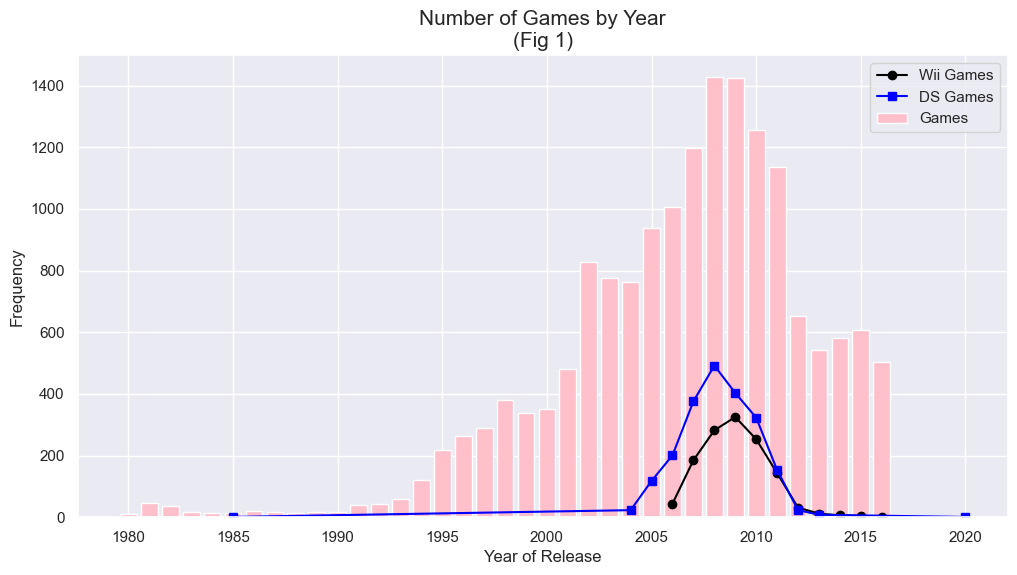

In [52]:
# plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(game_year .index, game_year .values, label='Games', color = 'pink')
ax.plot(wii.index, wii.values, color='black', marker='o', label='Wii Games')
ax.plot(ds.index, ds.values, color='blue', marker='s', label='DS Games')
ax.set_title("Number of Games by Year\n(Fig 1)", fontsize = 15)
ax.set_xlabel('Year of Release')
ax.set_ylabel('Frequency')
ax.legend()

plt.show()

Number Genre Overall

In [53]:
# number of game and sales by genre (combo)
games_by_genre = df.groupby('Genre')['Name'].apply('count').sort_values(ascending=False)
sales_by_genre = df.groupby('Genre')['Global_Sales'].apply('sum')
combo = pd.merge(games_by_genre,sales_by_genre,left_index=True,right_index=True)

Text(0.5, 0.98, 'Number of games and Sales(million USD) by Genre\n (Fig 2)')

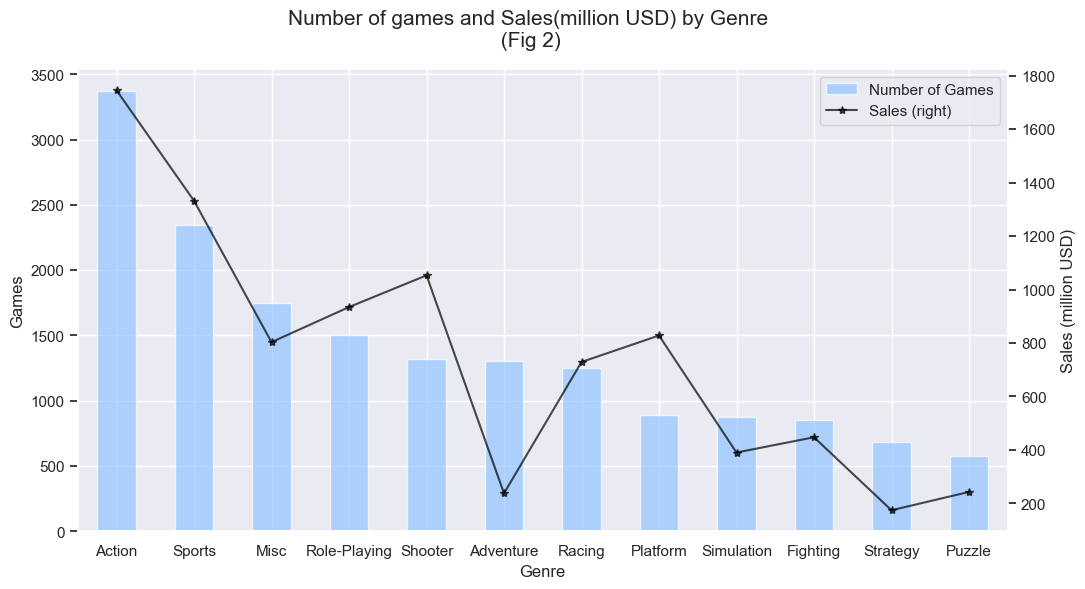

In [54]:
# plotting the bar chart
fig , ax =plt.subplots(figsize=(12, 6))
g = combo.plot(kind = 'bar',y ='Name',alpha=0.7,ax=ax,ylabel='Games',label = 'Number of Games')
s = combo.plot(kind = 'line',y ='Global_Sales',ax=ax ,marker = '*', secondary_y = True, alpha=0.7,color = 'black',linewidth = 1.5, ylabel='Sales (million USD)',label = 'Sales')
fig.suptitle('Number of games and Sales(million USD) by Genre\n (Fig 2)', fontsize = 15)

2. Number Genre By Year

In [55]:
# grouped genre by year
numgenge_year = df.groupby(['Year_of_Release', 'Genre']).size().reset_index(name='Count')
numgenge_year

,Year_of_Release,Genre,Count
0,1980,Action,1
1,1980,Fighting,1
2,1980,Misc,4
3,1980,Shooter,2
4,1980,Sports,1
...,...,...,...
385,2016,Sports,48
386,2016,Strategy,13
387,2017,Action,1
388,2017,Role-Playing,2


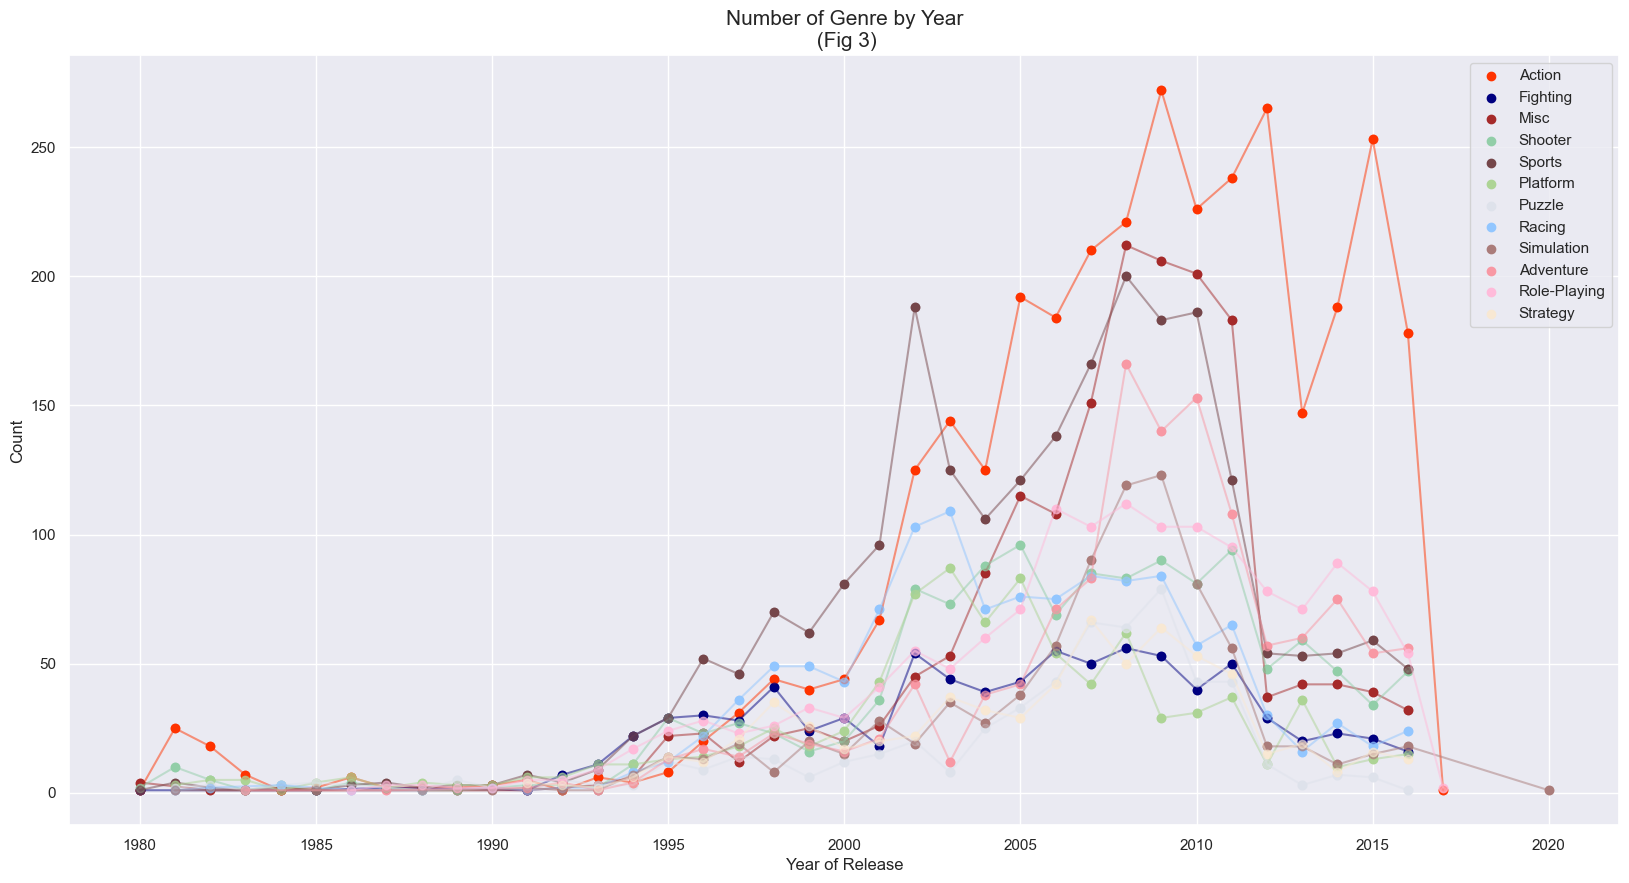

In [56]:
# plotting the scatter plot
# define a color dictionary for each genre
color_dict = {
    'Action': '#FF3300',
    'Adventure': '#DFE1BE',
    'Sports': '#75464A',
    'Shooter': '#92CEA8' ,
    'Role-Playing' : '#FFBBDA' ,
    'Platform' : '#ADD495' ,
    'Misc' :  '#A52A2A',
    'Ricing' :  '#9A9E8D',
    'Fighting' : '#000080' ,
    'Simulation' : '#AA7C7A' ,
    'Puzzle' : '#DEE2EB' ,
    'Adventure' : '#F898A4' ,
    'Strategy' : '#F8E8D3'

}

plt.figure(figsize=(20, 10))
for genre in numgenge_year['Genre'].unique():
    genre_data = numgenge_year[numgenge_year['Genre'] == genre]
    plt.scatter(genre_data['Year_of_Release'], genre_data['Count'], label=genre, color=color_dict.get(genre))
    plt.plot(genre_data['Year_of_Release'], genre_data['Count'], marker='o', linestyle='-', alpha=0.5, color=color_dict.get(genre))

plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.title('Number of Genre by Year\n (Fig 3)', fontsize = 15)
plt.legend()
plt.grid(True)
plt.show()

3. Sale by Genre

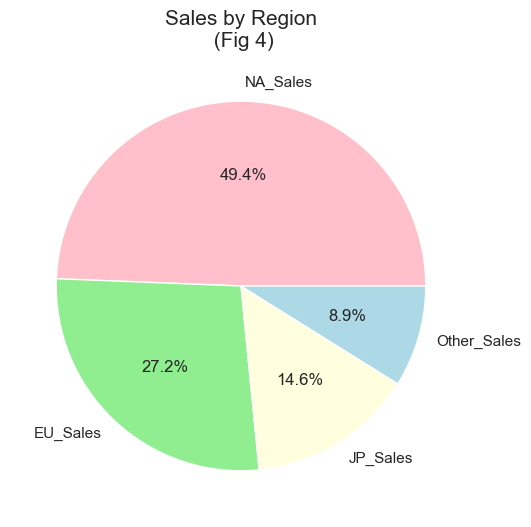

In [57]:
# group sales by genre
genre_total_sale = df.groupby(['Genre'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
region_total_sales = genre_total_sale[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
labels = region_total_sales.index
colors = ['pink', 'lightgreen', 'lightyellow', 'lightblue']

# plotting the pie chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(region_total_sales, labels=labels, autopct='%1.1f%%', colors=colors)
ax.set_title('Sales by Region\n (Fig 4)', fontsize = 15)
plt.show()

C:\Users\chane\AppData\Local\Temp\ipykernel_6692\4192925876.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data_log[column]), bins=20, kde=False, fit=stats.gamma , color =color[i] )


Text(0.5, 0.98, 'Distribution of Sales by Region\n(Fig 5)')

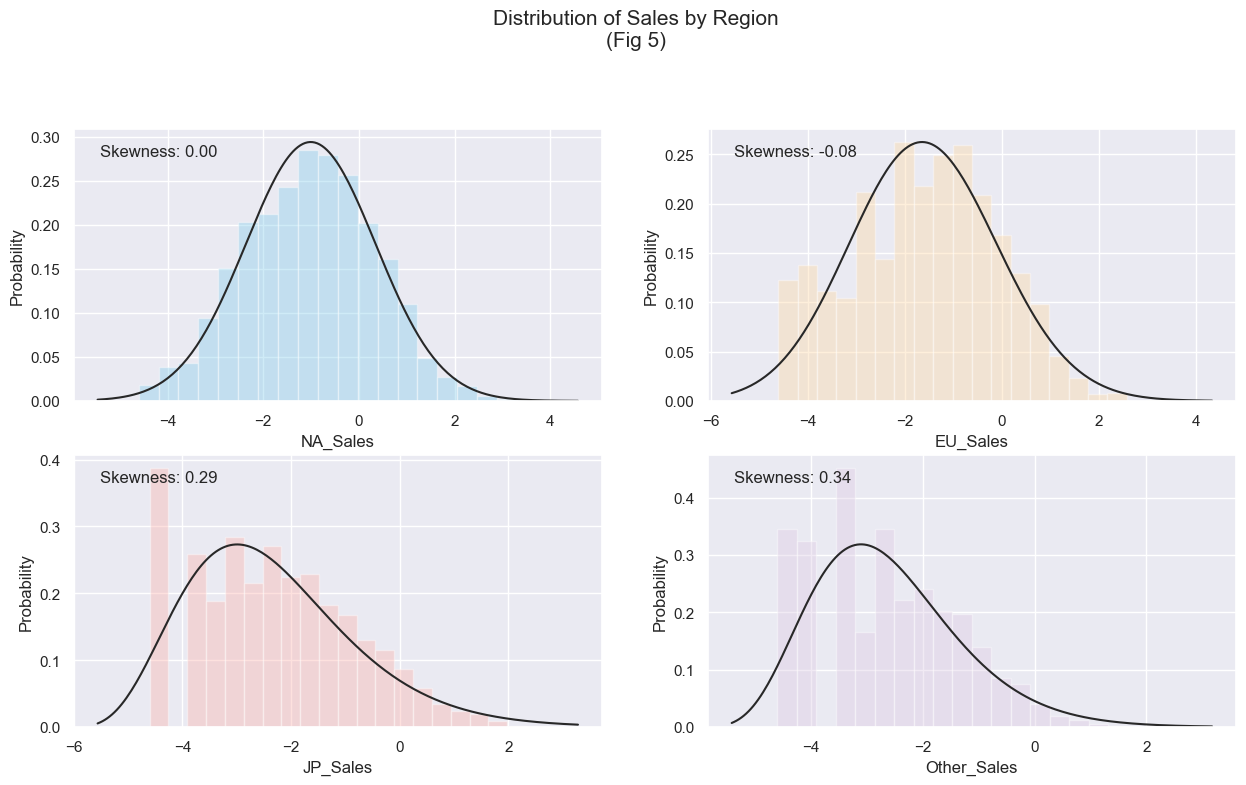

In [58]:
data_log = df.loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
data_log = data_log.dropna()

data_log = data_log[data_log.NA_Sales != 0]
data_log = data_log[data_log.EU_Sales != 0]
data_log = data_log[data_log.Other_Sales != 0]
data_log = data_log[data_log.JP_Sales != 0]

plt.figure(figsize=(15,12))
color = ['skyblue','#FED9A6','#FBB4AE','#DECBE4']
for i, column in enumerate(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']):
    plt.subplot(3,2,i+1)
    #sns.histplot(np.log(data_log[column]), bins=20, kde=False, stat="probability", color ='#FBB4AE')
    
    sns.distplot(np.log(data_log[column]), bins=20, kde=False, fit=stats.gamma , color =color[i] )
    skewness = stats.skew(np.log(data_log[column]))
    plt.text(0.05, 0.9, f"Skewness: {skewness:.2f}", transform=plt.gca().transAxes)
    plt.ylabel('Probability')

plt.suptitle('Distribution of Sales by Region\n(Fig 5)', fontsize = 15)


In [59]:
# group sales by genre
genre_global_sales = df.groupby(['Genre'])['Global_Sales'].sum().reset_index()
genre_global_sales

,Genre,Global_Sales
0,Action,1745.27
1,Adventure,237.69
2,Fighting,447.48
3,Misc,803.18
4,Platform,828.08
5,Puzzle,243.02
6,Racing,728.90
7,Role-Playing,934.40
8,Shooter,1052.94
9,Simulation,390.42


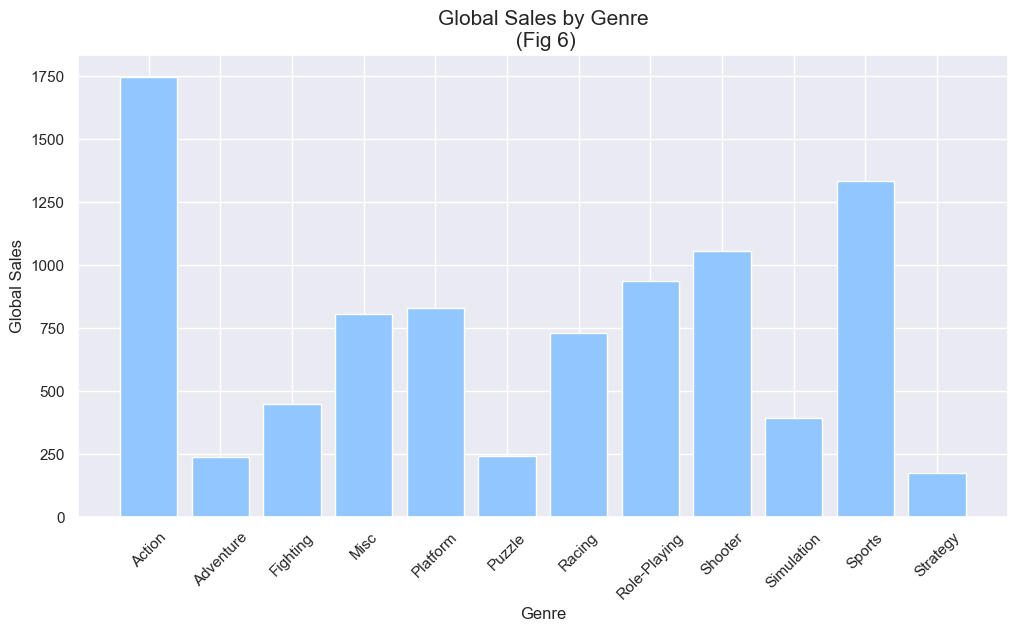

In [60]:
# potting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(genre_global_sales['Genre'], genre_global_sales['Global_Sales'])
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.title('Global Sales by Genre\n (Fig 6)', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

In [61]:
# group sale by genre
genre_total_sale = df.groupby(['Genre'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
genre_total_sale

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,879.01,519.13,161.44,184.60
1,Adventure,105.26,63.54,52.30,16.49
2,Fighting,223.36,100.33,87.48,36.36
3,Misc,407.27,212.74,108.11,74.39
4,Platform,445.50,200.35,130.83,51.09
5,Puzzle,122.87,50.01,57.31,12.38
6,Racing,359.35,236.51,56.71,76.10
7,Role-Playing,330.81,188.71,355.46,59.63
8,Shooter,592.24,317.34,38.76,104.11
9,Simulation,182.19,113.52,63.80,30.75


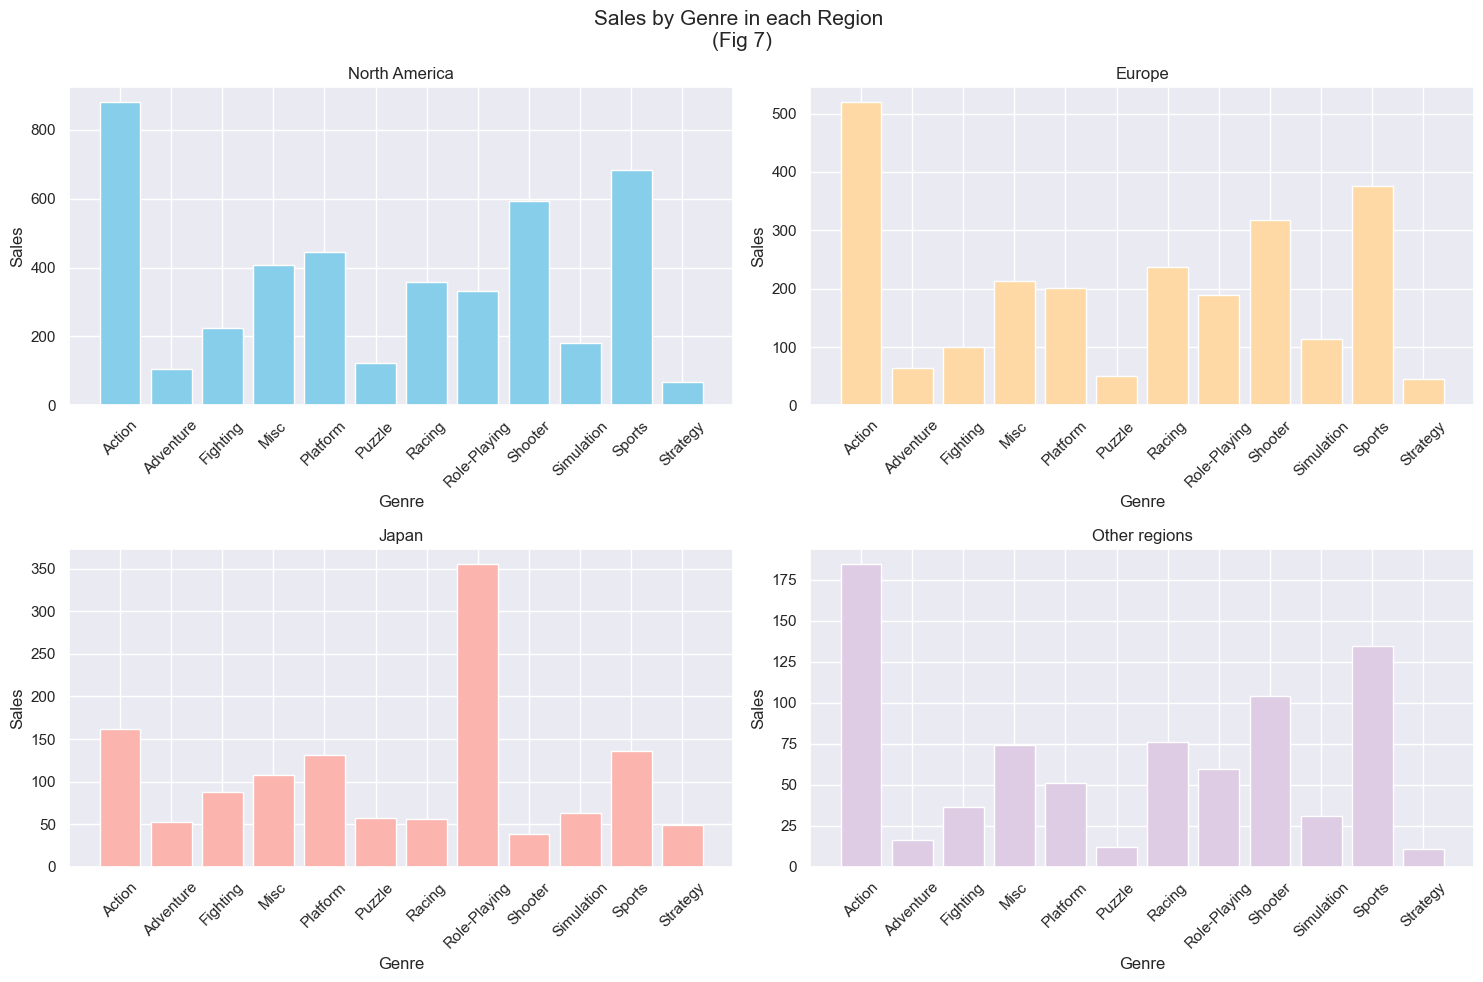

In [62]:
# potting the bar chart
fig, axs = plt.subplots(2, 2, figsize=(15, 10)) 
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
colors = ['skyblue','#FED9A6','#FBB4AE','#DECBE4']
labels = ['North America', 'Europe', 'Japan', 'Other regions']

for i, ax in enumerate(axs.flatten()):
    ax.bar(genre_total_sale['Genre'], genre_total_sale[regions[i]], color=colors[i])
    ax.set_xlabel('Genre')
    ax.set_ylabel('Sales')
    ax.set_xticks(range(len(genre_total_sale['Genre'])))
    ax.set_xticklabels(genre_total_sale['Genre'], rotation=45) 
    ax.set_title(f"{labels[i]}")

plt.suptitle('Sales by Genre in each Region \n(Fig 7)', fontsize = 15)
plt.tight_layout()
plt.show()

4. Sale by Platform

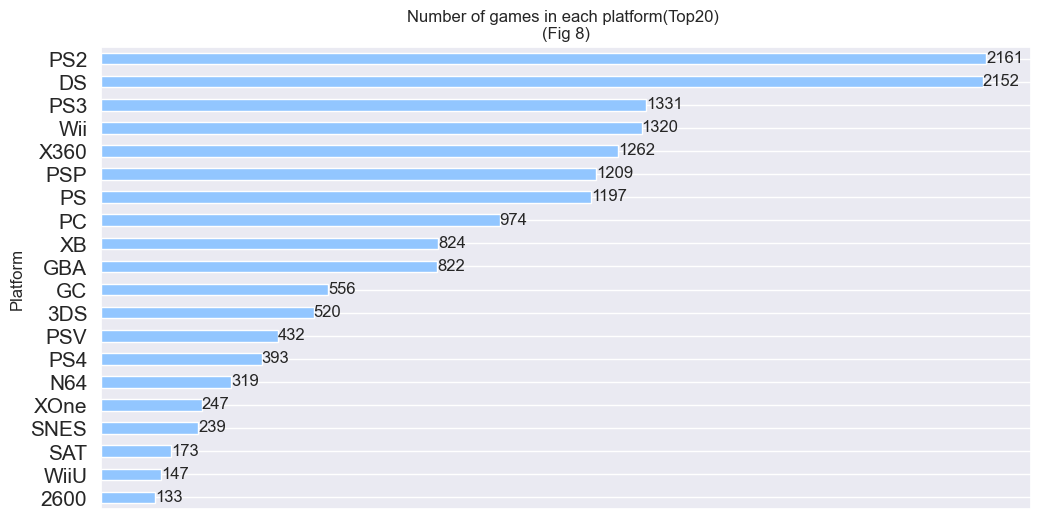

In [63]:
# number of name in each platform
games_by_pf = df.groupby('Platform')['Name'].apply('count').sort_values(ascending=True)
games_by_pf = games_by_pf.tail(20)

plot = games_by_pf.plot(kind = 'barh', figsize = (12,6),xticks=[],title = 'Number of games in each platform(Top20) \n(Fig 8)', fontsize = 15)

games_by_pf.reset_index(drop=True)
for index, value in enumerate(games_by_pf):
    plot.text(value , index- 0.15 , str(value))

Text(0.5, 0.98, 'Sales by Platform\n (Fig 9)')

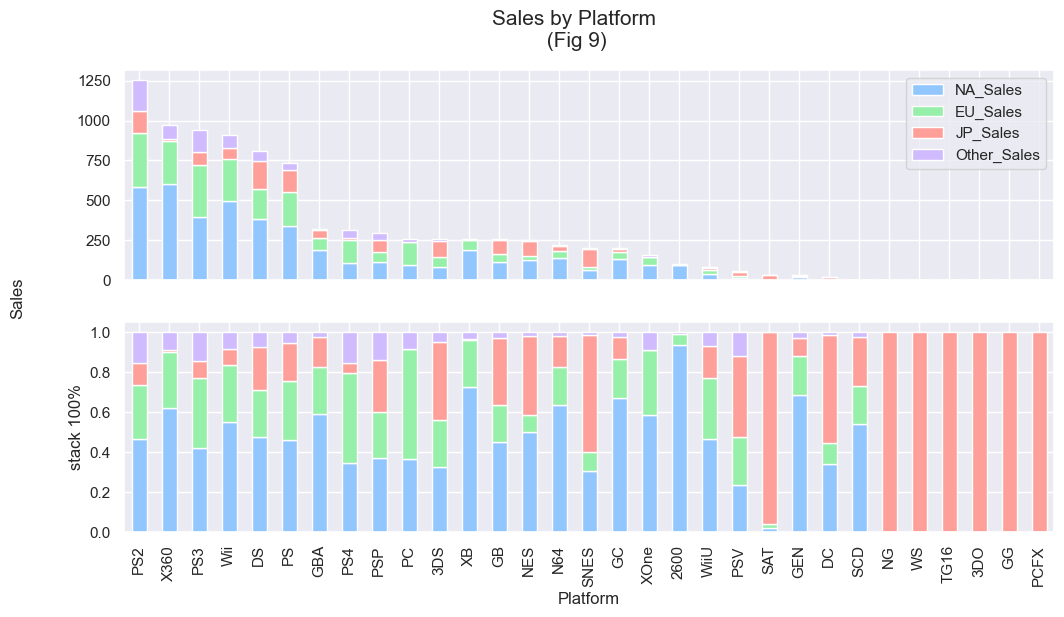

In [64]:
# sales by platform
sales_ptf = df.groupby('Platform')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].apply('sum').sort_values(by=['Global_Sales'],ascending=False)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
sales_ptf[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].plot(kind = 'bar',stacked = True,ax =ax1)


normalized_data = sales_ptf[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].div(sales_ptf[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1), axis=0)
normalized_data.plot(kind='bar', stacked=True, ax =ax2 , legend = False , ylabel = 'stack 100%')

fig.suptitle('Sales by Platform')
fig.text(0.03, 0.5, 'Sales', va='center', rotation='vertical')

fig.suptitle('Sales by Platform\n (Fig 9)', fontsize = 15)

manufactureur,Atari Inc.,Bandai,Microsoft,NEC,Nintendo,Panasonic,SNK,Sega,Sony
NA_Sales,90.60,0.00,882.28,0.00,1762.67,0.0,0.00,28.20,1544.34
EU_Sales,5.47,0.00,383.30,0.00,780.74,0.0,0.00,8.64,1104.08
JP_Sales,0.00,1.42,14.15,0.19,762.03,0.1,1.44,44.01,473.92
Other_Sales,0.91,0.00,108.75,0.00,191.68,0.0,0.00,1.36,466.26


Text(0.5, 0.98, 'Top 3 manufacturer\n (Fig 10)')

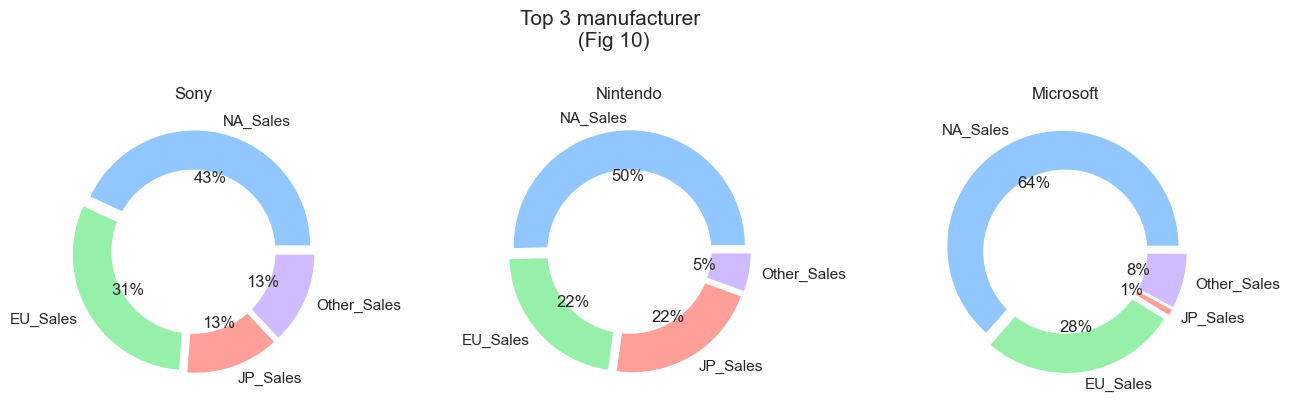

In [65]:
manufac = df.groupby('manufactureur')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].apply('sum')

manufac.index.name = 'manufactureur'
manufac = manufac.T

explode = (0.05, 0.05, 0.05,0.05)
display(manufac)
for i, column in enumerate(['Sony', 'Nintendo', 'Microsoft']):
    plt.subplot(1,3,i+1)
    manufac[column].plot(kind ='pie', autopct='%1.0f%%',explode=explode , legend = False ,figsize = (15,5) , title =column ,ylabel = '')
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)

plt.subplots_adjust( wspace= 0.5)
plt.suptitle('Top 3 manufacturer\n (Fig 10)', fontsize = 15)
    

[Text(0.5, 1.0, 'Global Sales\n (Fig 11)')]

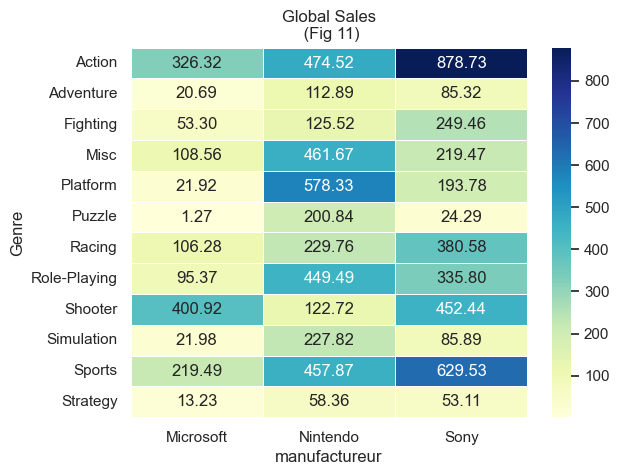

In [66]:
h = df[['Genre','manufactureur','Global_Sales']]
h = h.pivot_table(values='Global_Sales', index='Genre', columns='manufactureur', aggfunc='sum')

cut = ['Bandai','NEC','Panasonic','SNK','Sega','Atari Inc.']
h = h.drop(cut, axis=1)
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(h, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='.2f' ).set(title = 'Global Sales\n (Fig 11)') #camp = 'RdYlGn_r','PiYG'

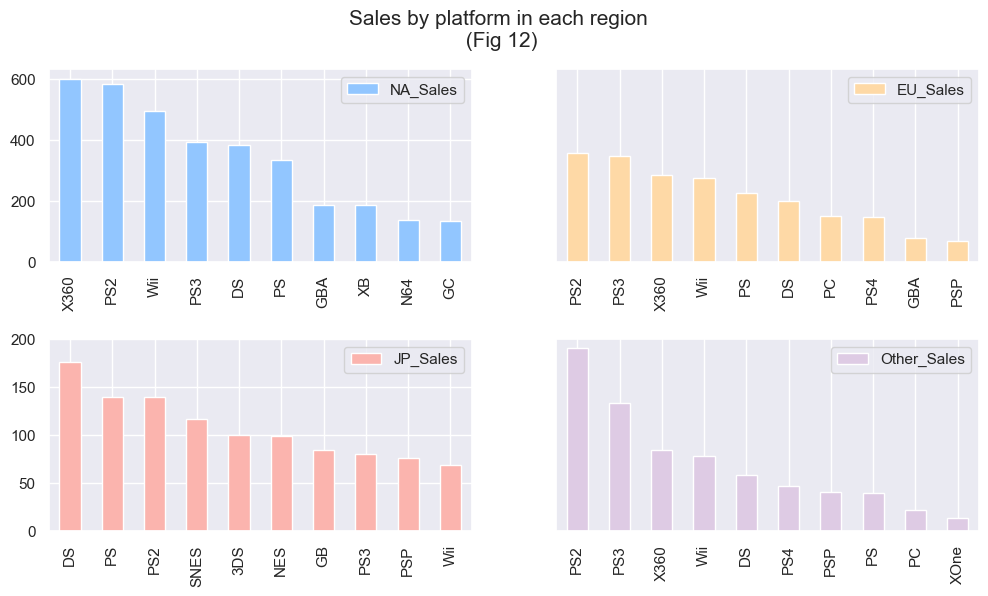

In [67]:
# sales by platform in each region
fig, (ax) = plt.subplots(2, 2, figsize=(12, 6), sharex=False)
na = df.groupby('Platform')[['NA_Sales']].apply('sum').sort_values(by='NA_Sales',ascending=False)
eu = df.groupby('Platform')[['EU_Sales']].apply('sum').sort_values(by='EU_Sales',ascending=False)
jp = df.groupby('Platform')[['JP_Sales']].apply('sum').sort_values(by='JP_Sales',ascending=False)
ot = df.groupby('Platform')[['Other_Sales']].apply('sum').sort_values(by='Other_Sales',ascending=False)

na.head(10).plot(kind = 'bar',ax=ax[0,0] , xlabel = '')
eu.head(10).plot(kind = 'bar',ax=ax[0,1],color ='#FED9A6', xlabel = '',yticks=[])
jp.head(10).plot(kind = 'bar',ax=ax[1,0],color ='#FBB4AE', xlabel ='')
ot.head(10).plot(kind = 'bar',ax=ax[1,1],color ='#DECBE4', xlabel = '',yticks=[])

ax[0,1].set_ylim(0, 600)
ax[1,0].set_ylim(0, 200)
plt.suptitle('Sales by platform in each region\n (Fig 12)', fontsize = 15)  
plt.subplots_adjust(hspace=0.4)


5. Top 20 Genre with Highest Sale 

Text(0.5, 0.98, 'Top20 Games with highest sales\n (Fig 13)')

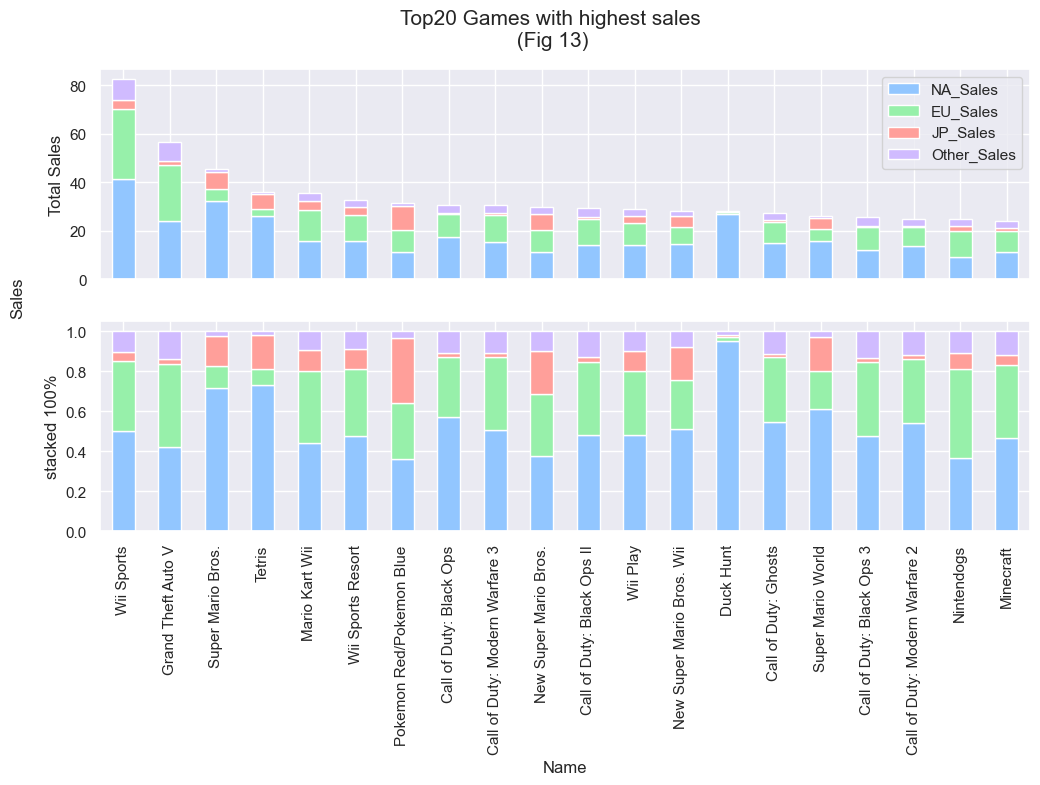

In [68]:
# Top 20 Game with high sale
top20sales = df.groupby('Name')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].apply('sum').sort_values(by=['Global_Sales'],ascending=False)
top20sales = top20sales.head(20)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

top20sales[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].plot(kind = 'bar',stacked = True,ax =ax1 , ylabel = 'Total Sales')
#ax1.set_title('Top Subplot')

normalized_data = top20sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].div(top20sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1), axis=0)
normalized_data.plot(kind='bar', stacked=True, ax =ax2 , legend = False , ylabel = 'stacked 100%')

fig.text(0.05, 0.5, 'Sales', va='center', rotation='vertical')
#plt.subplots_adjust(hspace=0.4)
fig.suptitle('Top20 Games with highest sales\n (Fig 13)', fontsize = 15)

6. 4 Series Game Analyze

In [69]:
df_pokemon = df.loc[(df['Name'].str.contains('pokemon', case=False) | (df['Name'].str.contains('Poké', case=False))), ['Name','Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
df_pokemon = df_pokemon.sort_values( by=['Global_Sales'], ascending=[False])
df_pokemon.head()

,Name,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
717,Pokemon Red/Pokemon Blue,GB,11.27,8.89,10.22,1.00,31.37
719,Pokemon Gold/Pokemon Silver,GB,9.00,6.18,7.20,0.71,23.10
816,Pokemon Diamond/Pokemon Pearl,DS,6.38,4.46,6.04,1.36,18.25
3171,Pokemon Ruby/Pokemon Sapphire,GBA,6.06,3.90,5.38,0.50,15.85
817,Pokemon Black/Pokemon White,DS,5.51,3.17,5.65,0.80,15.14


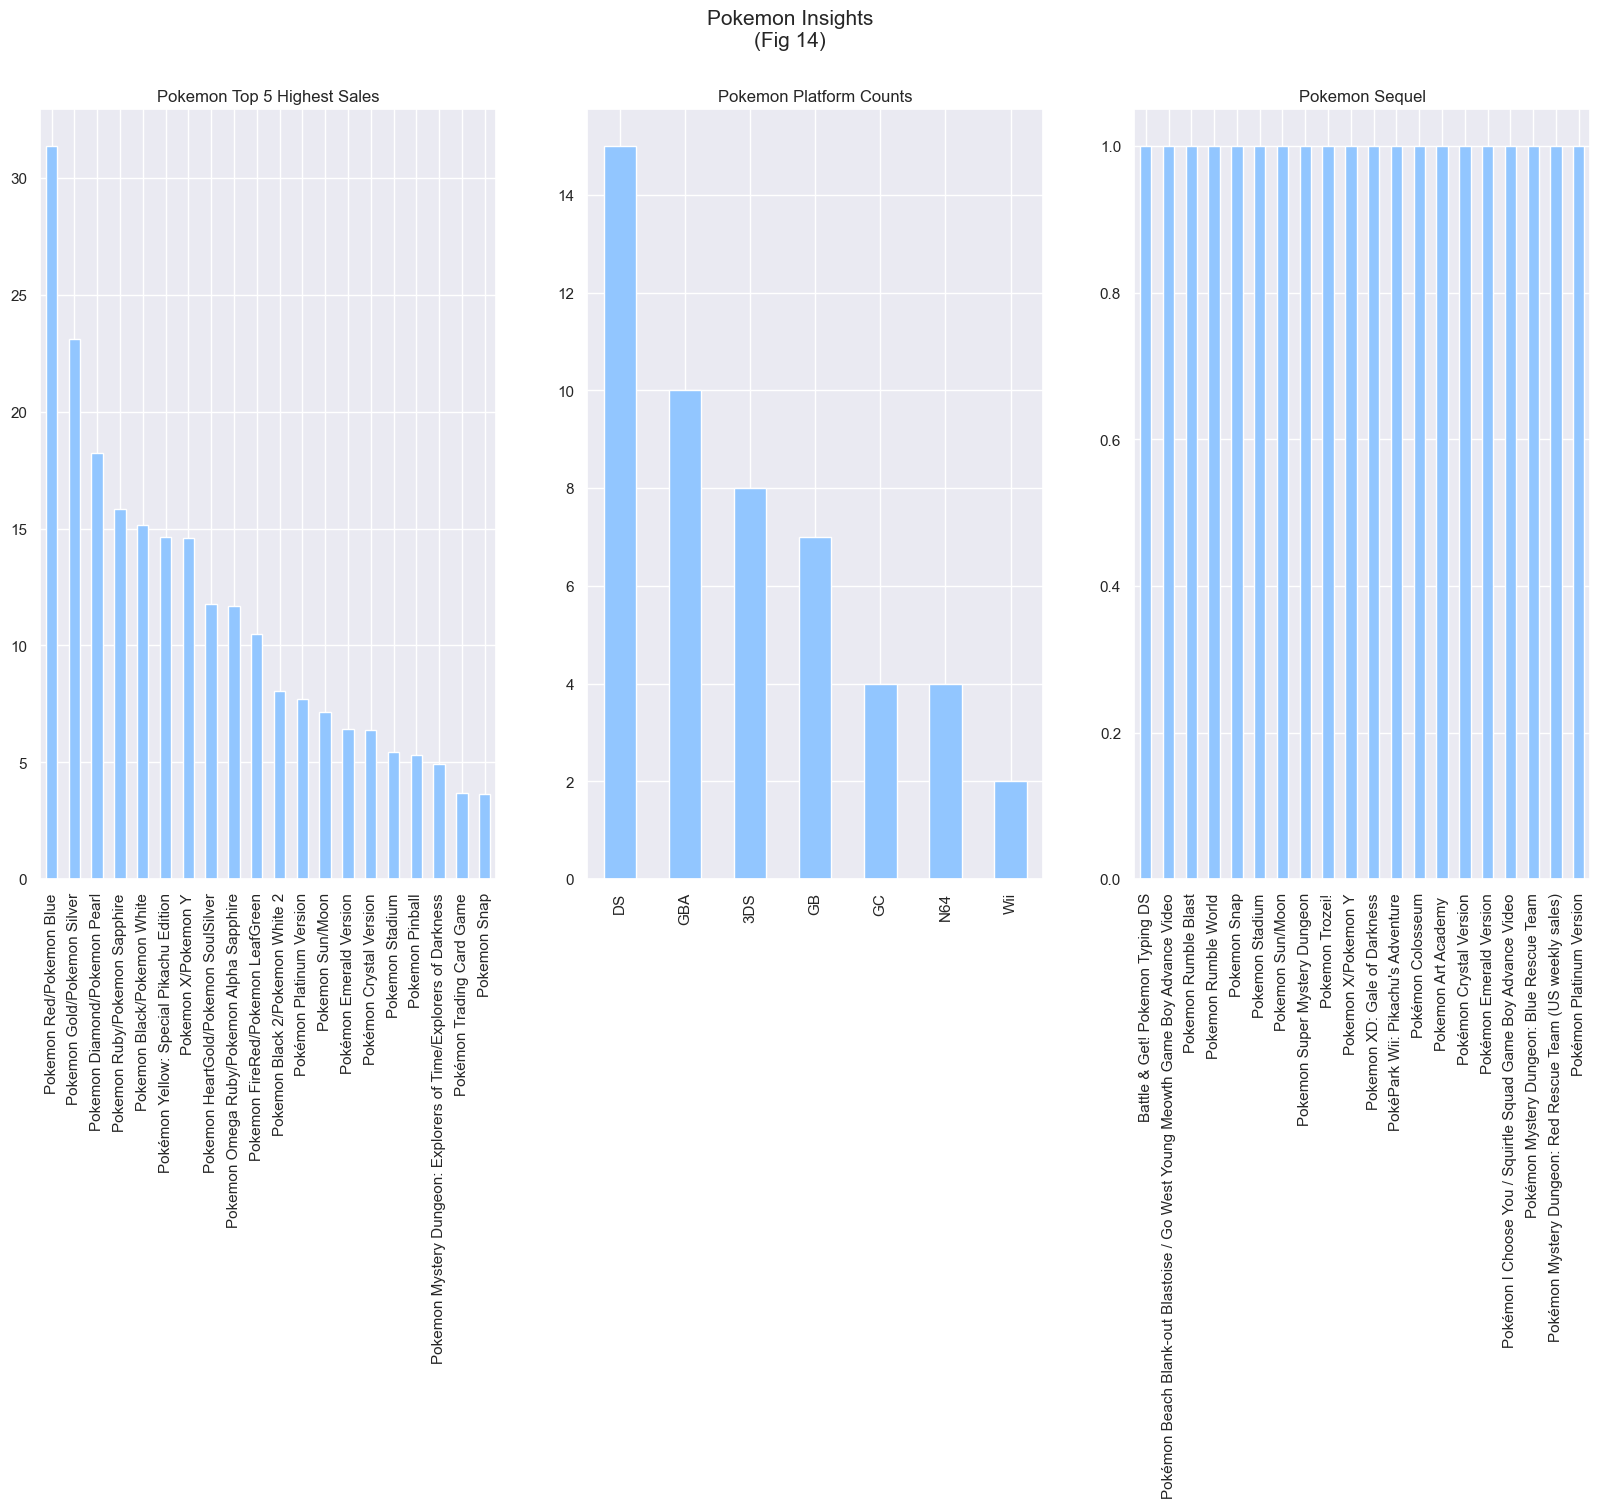

In [70]:
# plotting the bar chart
plt.figure(figsize=(20, 10))
plt.suptitle('Pokemon Insights\n(Fig 14)', fontsize = 15)

for i in range(1,4):
    plt.subplot(1,3,i)
    if(i == 1):
        df_pokemon_sales = df_pokemon.groupby(['Name'])['Global_Sales'].sum().reset_index()
        df_pokemon_sales = df_pokemon_sales.sort_values( by=['Global_Sales'], ascending=[False])
        df_pokemon_sales = df_pokemon_sales.set_index('Name')
        df_pokemon_sales['Global_Sales'].head(20).plot(kind='bar', edgecolor='white', width = 0.5, xlabel = '')
        plt.title("Pokemon Top 5 Highest Sales")
    elif(i == 2):
        df_pokemon_platform = df_pokemon.groupby(['Platform']).size().reset_index(name='count')
        df_pokemon_platform = df_pokemon_platform.set_index('Platform')
        df_pokemon_platform = df_pokemon_platform.sort_values( by=['count'], ascending=[False])
        df_pokemon_platform['count'].plot(kind='bar', edgecolor='white', width = 0.5, xlabel = '')
        plt.title("Pokemon Platform Counts")
    elif(i == 3):
        df_pokemon_sequel = df_pokemon.groupby(['Name']).size().reset_index(name='count')
        df_pokemon_sequel = df_pokemon_sequel.sort_values( by=['count'], ascending=[False])
        df_pokemon_sequel = df_pokemon_sequel.set_index('Name')
        df_pokemon_sequel['count'].head(20).plot(kind='bar', edgecolor='white', width = 0.5, xlabel = '')
        plt.title("Pokemon Sequel")
plt.show()

In [71]:
df_ff = df.loc[(df['Name'].str.contains('final fantasy', case=False, na=False)), ['Name','Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
df_ff = df_ff.sort_values( by=['Global_Sales'], ascending=[False])
df_ff.head()

,Name,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15240,Final Fantasy VII,PS,3.01,2.47,3.28,0.96,9.72
15236,Final Fantasy X,PS2,2.91,2.07,2.73,0.33,8.05
15241,Final Fantasy VIII,PS,2.28,1.72,3.63,0.23,7.86
7840,Final Fantasy XII,PS2,1.88,0.00,2.33,1.74,5.95
7836,Final Fantasy XIII,PS3,1.74,1.21,1.87,0.51,5.33


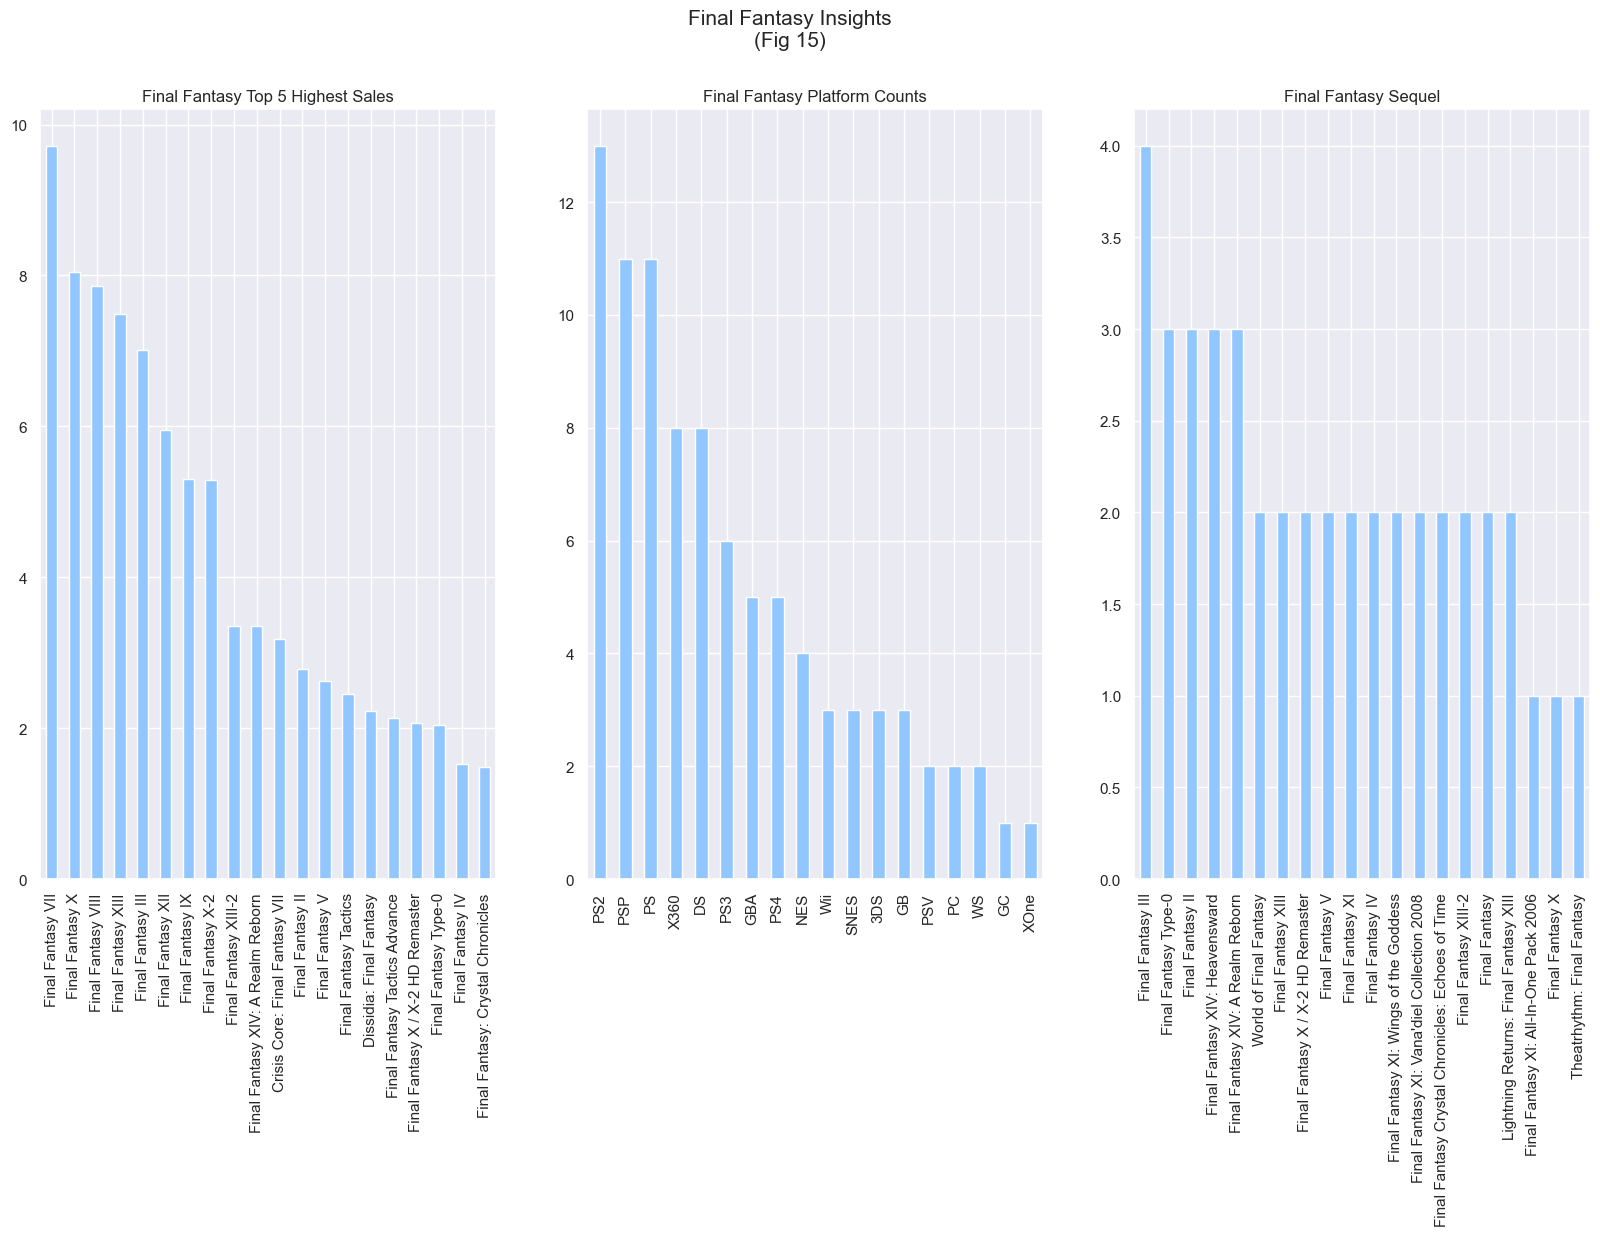

In [72]:
# plotting the bar chart
plt.figure(figsize=(20, 10))
plt.suptitle('Final Fantasy Insights\n(Fig 15)' , fontsize = 15)
for i in range(1,4):
    plt.subplot(1,3,i)
    if(i == 1):
        df_ff_sales = df_ff.groupby(['Name'])['Global_Sales'].sum().reset_index()
        df_ff_sales = df_ff_sales.sort_values( by=['Global_Sales'], ascending=[False])
        df_ff_sales = df_ff_sales.set_index('Name')
        df_ff_sales['Global_Sales'].head(20).plot(kind='bar', edgecolor='white', width = 0.5, xlabel = '')
        plt.title("Final Fantasy Top 5 Highest Sales")
    elif(i == 2):
        df_ff_platform = df_ff.groupby(['Platform']).size().reset_index(name='count')
        df_ff_platform = df_ff_platform.set_index('Platform')
        df_ff_platform = df_ff_platform.sort_values( by=['count'], ascending=[False])
        df_ff_platform['count'].plot(kind='bar', edgecolor='white', width = 0.5, xlabel = '')
        plt.title("Final Fantasy Platform Counts")
    elif(i == 3):
        df_ff_sequel = df_ff.groupby(['Name']).size().reset_index(name='count')
        df_ff_sequel = df_ff_sequel.sort_values( by=['count'], ascending=[False])
        df_ff_sequel = df_ff_sequel.set_index('Name')
        df_ff_sequel['count'].head(20).plot(kind='bar', edgecolor='white', width = 0.5, xlabel = '')
        plt.title("Final Fantasy Sequel")

In [73]:
df_mario = df.loc[(df['Name'].str.contains('mario', case=False, na=False)), ['Name','Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
df_mario = df_mario.sort_values( by=['Global_Sales'], ascending=[False])
df_mario.head()

,Name,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
619,Super Mario Bros.,NES,29.08,3.58,6.81,0.77,40.24
1,Mario Kart Wii,Wii,15.68,12.76,3.79,3.29,35.52
15,New Super Mario Bros.,DS,11.28,9.14,6.50,2.88,29.80
4,New Super Mario Bros. Wii,Wii,14.44,6.94,4.70,2.24,28.32
16,Mario Kart DS,DS,9.71,7.47,4.13,1.90,23.21


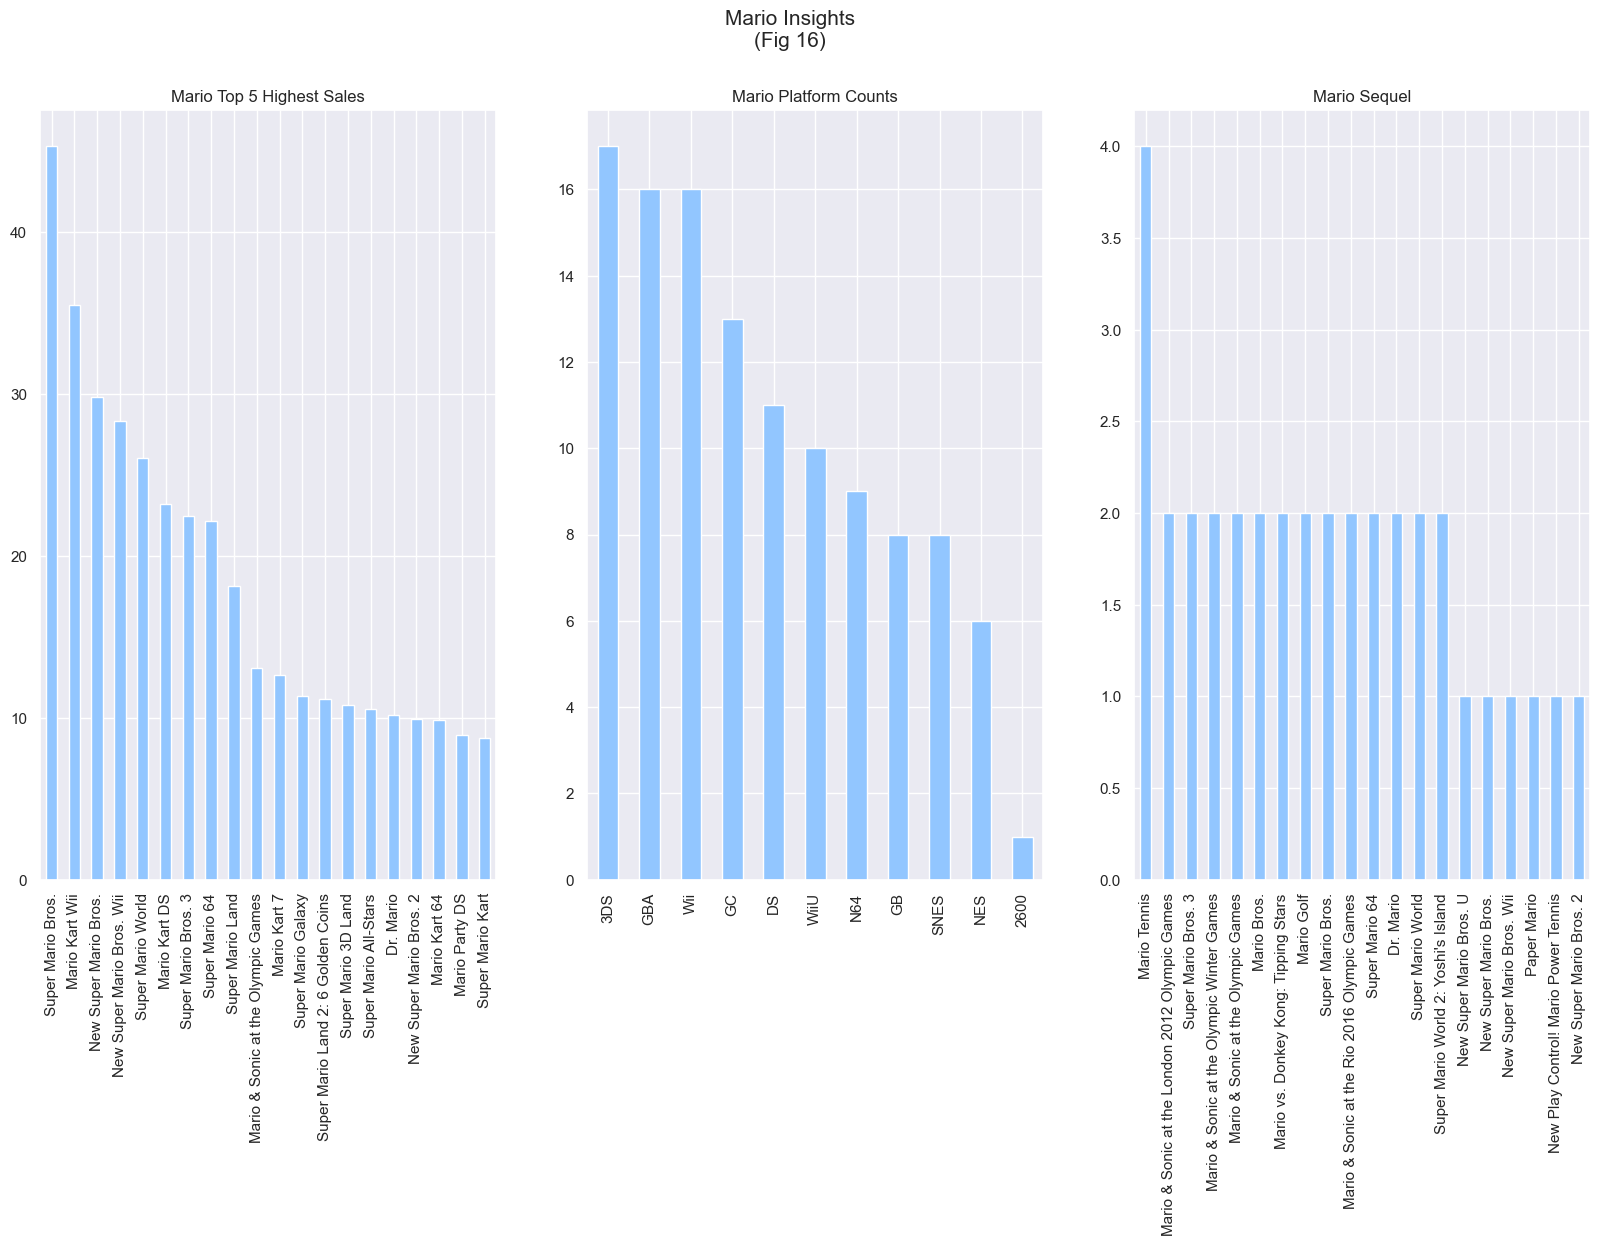

In [74]:
# plotting the bar chart
plt.figure(figsize=(20, 10))
plt.suptitle('Mario Insights\n(Fig 16)', fontsize = 15)
for i in range(1,4):
    plt.subplot(1,3,i)
    if(i == 1):
        df_mario_sales = df_mario.groupby(['Name'])['Global_Sales'].sum().reset_index()
        df_mario_sales = df_mario_sales.sort_values( by=['Global_Sales'], ascending=[False])
        df_mario_sales = df_mario_sales.set_index('Name')
        df_mario_sales['Global_Sales'].head(20).plot(kind='bar', edgecolor='white', width = 0.5, xlabel = '')
        plt.title("Mario Top 5 Highest Sales")
    elif(i == 2):
        df_mario_platform = df_mario.groupby(['Platform']).size().reset_index(name='count')
        df_mario_platform = df_mario_platform.set_index('Platform')
        df_mario_platform = df_mario_platform.sort_values( by=['count'], ascending=[False])
        df_mario_platform['count'].plot(kind='bar', edgecolor='white', width = 0.5, xlabel = '')
        plt.title("Mario Platform Counts")
    elif(i == 3):
        df_mario_sequel = df_mario.groupby(['Name']).size().reset_index(name='count')
        df_mario_sequel = df_mario_sequel.sort_values( by=['count'], ascending=[False])
        df_mario_sequel = df_mario_sequel.set_index('Name')
        df_mario_sequel['count'].head(20).plot(kind='bar', edgecolor='white', width = 0.5, xlabel = '')
        plt.title("Mario Sequel")
plt.show()

In [75]:
df_cod = df.loc[(df['Name'].str.contains("call of duty", case=False, na=False)), ['Name','Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
df_cod = df_cod.sort_values( by=['Global_Sales'], ascending=[False])
#df_cod

df_cod_sales = df_cod.groupby(['Name'])['Global_Sales'].sum().reset_index()
df_cod_sales = df_cod_sales.sort_values( by=['Global_Sales'], ascending=[False])
#df_cod_sales
df_cod

,Name,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
13704,Call of Duty: Modern Warfare 3,X360,9.04,4.24,0.13,1.32,14.73
3471,Call of Duty: Black Ops 3,PS4,6.03,5.86,0.36,2.38,14.63
8689,Call of Duty: Black Ops,X360,9.70,3.68,0.11,1.13,14.61
8695,Call of Duty: Black Ops II,PS3,4.99,5.73,0.65,2.42,13.79
8690,Call of Duty: Black Ops II,X360,8.25,4.24,0.07,1.12,13.67
...,...,...,...,...,...,...,...
13720,Call of Duty: Infinite Warfare,PC,0.04,0.08,0.00,0.01,0.14
13721,Call of Duty 2,PC,0.00,0.05,0.00,0.01,0.06
14874,Call of Duty: The War Collection,X360,0.05,0.00,0.00,0.00,0.06
13711,Call of Duty: Modern Warfare Trilogy,X360,0.02,0.02,0.00,0.00,0.04


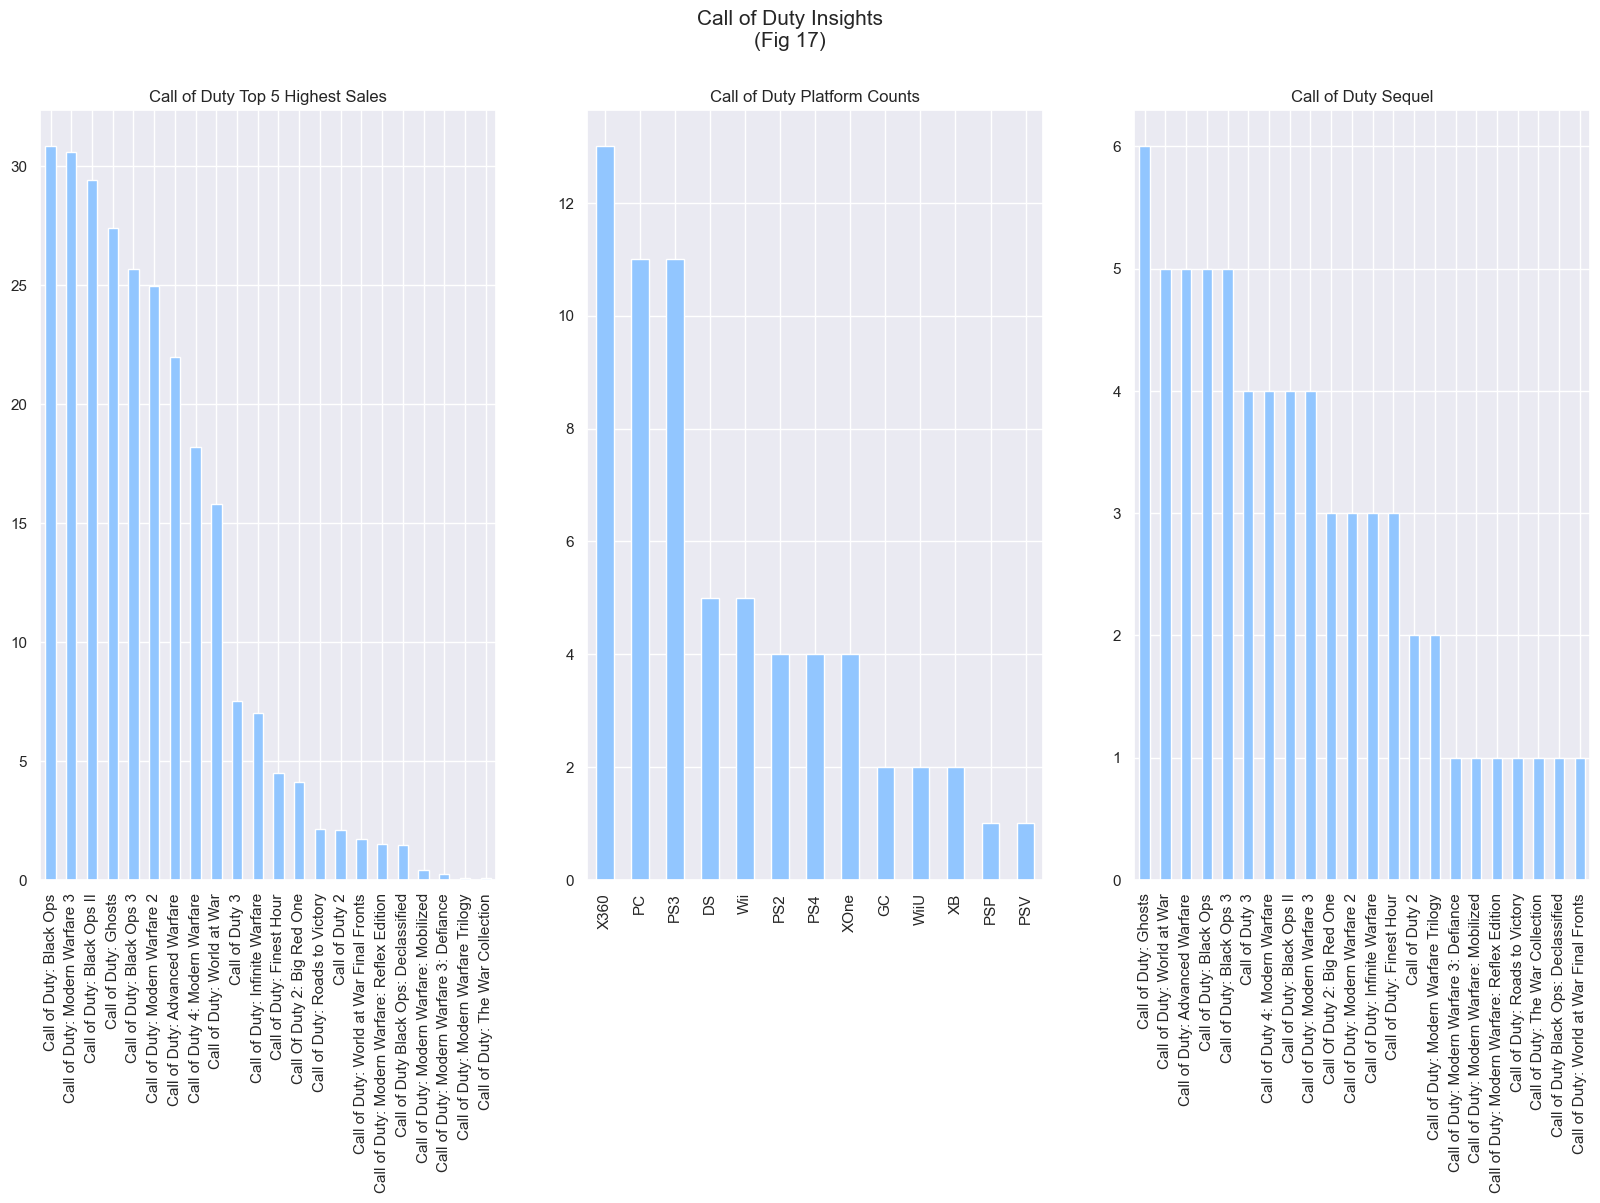

In [76]:
# plotting the bar chart
plt.figure(figsize=(20, 10))
plt.suptitle("Call of Duty Insights\n(Fig 17)", fontsize = 15)
for i in range(1,4):
    plt.subplot(1,3,i)
    if(i == 1):
        df_cod_sales = df_cod.groupby(['Name'])['Global_Sales'].sum().reset_index()
        df_cod_sales = df_cod_sales.sort_values( by=['Global_Sales'], ascending=[False])
        df_cod_sales = df_cod_sales.set_index('Name')
        df_cod_sales['Global_Sales'].plot(kind='bar', edgecolor='white', width = 0.5, xlabel = '' )
        plt.title("Call of Duty Top 5 Highest Sales")
    elif(i == 2):
        df_cod_platform = df_cod.groupby(['Platform']).size().reset_index(name='count')
        df_cod_platform = df_cod_platform.set_index('Platform')
        df_cod_platform = df_cod_platform.sort_values( by=['count'], ascending=[False])
        df_cod_platform['count'].plot(kind='bar', edgecolor='white', width = 0.5, xlabel = '')
        plt.title("Call of Duty Platform Counts")
    elif(i == 3):
        df_cod_sequel = df_cod.groupby(['Name']).size().reset_index(name='count')
        df_cod_sequel = df_cod_sequel.sort_values( by=['count'], ascending=[False])
        df_cod_sequel = df_cod_sequel.set_index('Name')
        df_cod_sequel['count'].plot(kind='bar', edgecolor='white', width = 0.5, xlabel = '')
        plt.title("Call of Duty Sequel")
plt.show()

7. Score Distribution

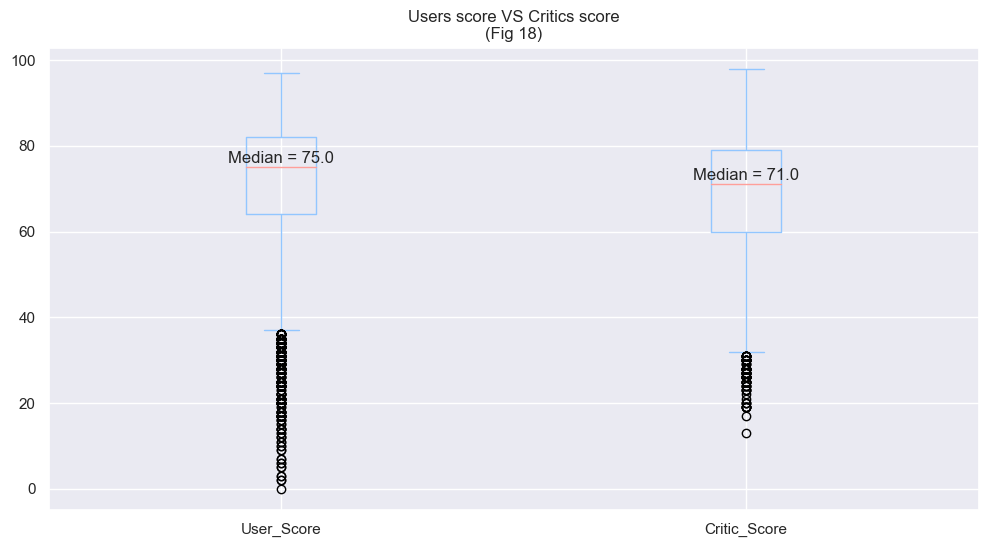

In [77]:
#Critics VS Users score 
score = df[['User_Score','Critic_Score']]

ax = score.plot(kind='box', figsize=(12, 6), title='Users score VS Critics score\n(Fig 18)')
s_median = score.median()

for i, col in enumerate(score.columns):
    ax.text(i + 1, s_median[col] +1, f'Median = {s_median[col]}', horizontalalignment='center')

Text(0.5, 0.98, 'Critics VS Users score by Genre\n(Fig 19)')

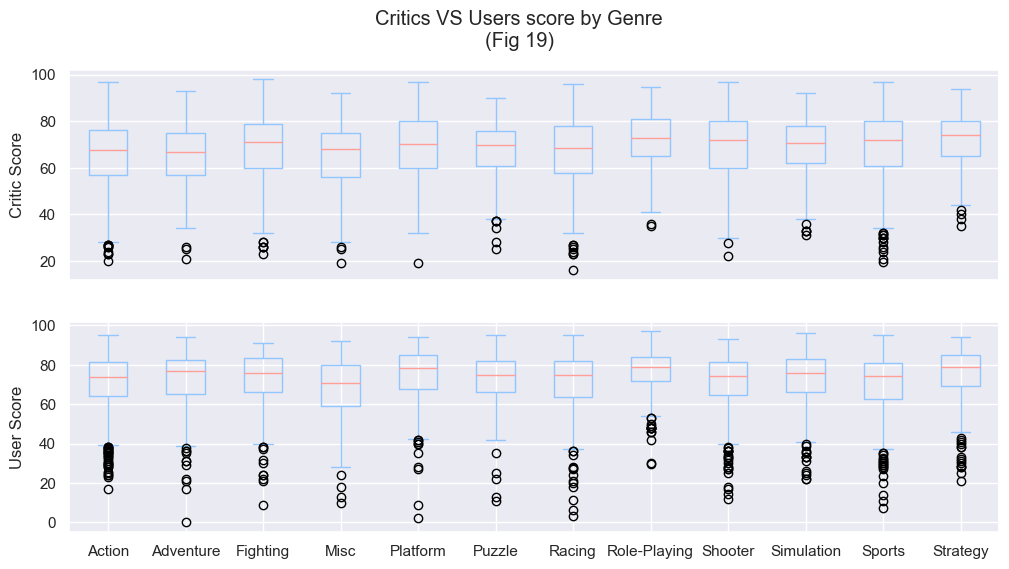

In [78]:
#Critics VS Users score by Platform

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

critic = df[['Name','Critic_Score','Genre']]
critic = critic.pivot_table(index='Name', columns='Genre', values='Critic_Score'  )

box1 = critic.plot(kind = 'box',figsize=(12, 6),ax= ax1,xticks=[], ylabel='Critic Score')

user = df[['Name','User_Score','Genre']]
user = user.pivot_table(index='Name', columns='Genre', values='User_Score' )

box2 = user.plot(kind = 'box',figsize=(12, 6),ax= ax2, ylabel='User Score')

fig.suptitle('Critics VS Users score by Genre\n(Fig 19)')

Text(0.5, 0.98, 'Critics VS Users score by Platform\n (Fig 20)')

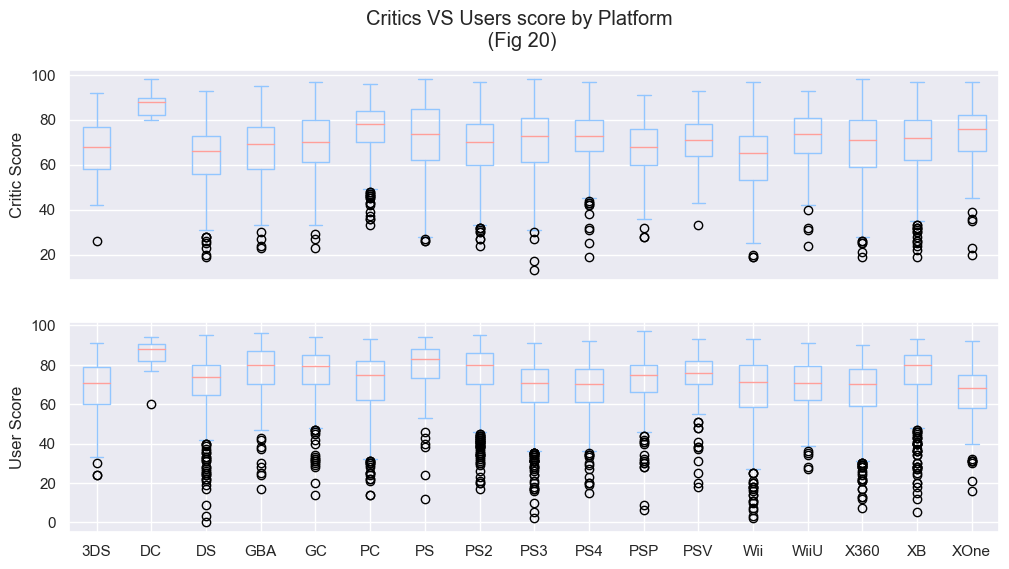

In [79]:
#Critics VS Users score by Platform

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

critic = df[['Name','Critic_Score','Platform']]
critic = critic.pivot_table(index='Name', columns='Platform', values='Critic_Score'  )

box1 = critic.plot(kind = 'box',figsize=(12, 6),ax= ax1,xticks=[], ylabel='Critic Score')

user = df[['Name','User_Score','Platform']]
user = user.pivot_table(index='Name', columns='Platform', values='User_Score' )

box2 = user.plot(kind = 'box',figsize=(12, 6),ax= ax2, ylabel='User Score')

fig.suptitle('Critics VS Users score by Platform\n (Fig 20)')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


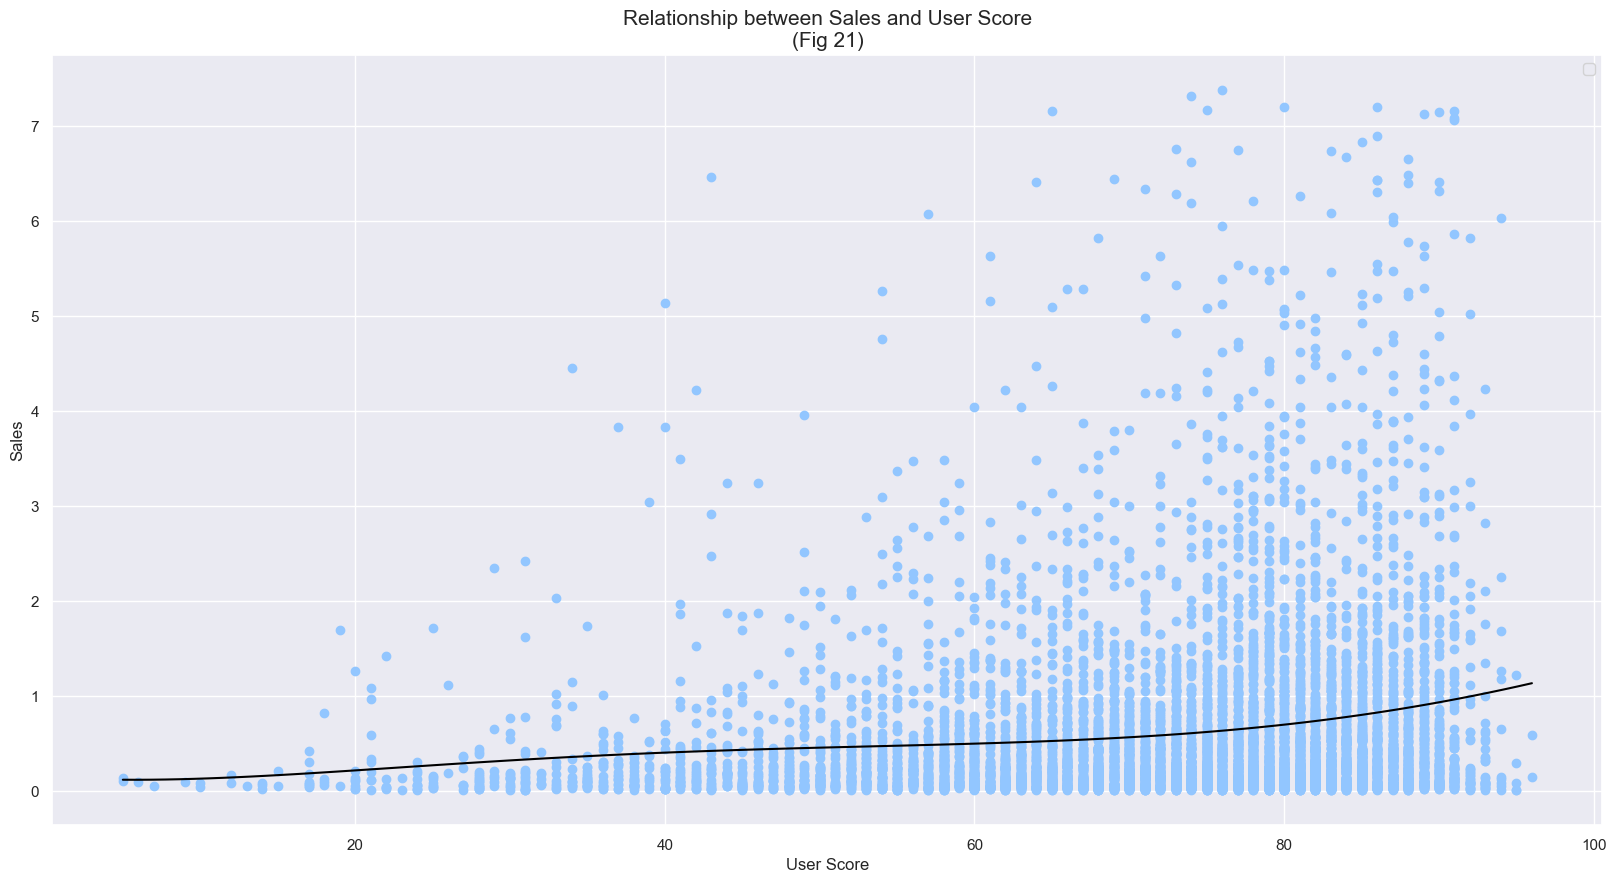

In [80]:
sa = df[['Global_Sales','Critic_Score','User_Score']].sort_values(by ='Global_Sales' ,ascending=False)
sa = sa.iloc[100:]
sa = sa.dropna() 

fig, ax = plt.subplots(figsize=(20, 10)) 
fig.set_dpi(100.0)

plt.scatter(sa['User_Score'], sa['Global_Sales'])

# Fit non-linear trendline
trendline = np.polyfit(sa['User_Score'], sa['Global_Sales'], 5)
trendline_x = np.linspace(sa['User_Score'].min(), sa['User_Score'].max(), 100)
trendline_y = np.polyval(trendline, trendline_x)
plt.plot(trendline_x, trendline_y, color='black')

plt.xlabel('User Score')
plt.ylabel('Sales')
plt.legend()
plt.title('Relationship between Sales and User Score\n(Fig 21)', fontsize = 15)
plt.show()